In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

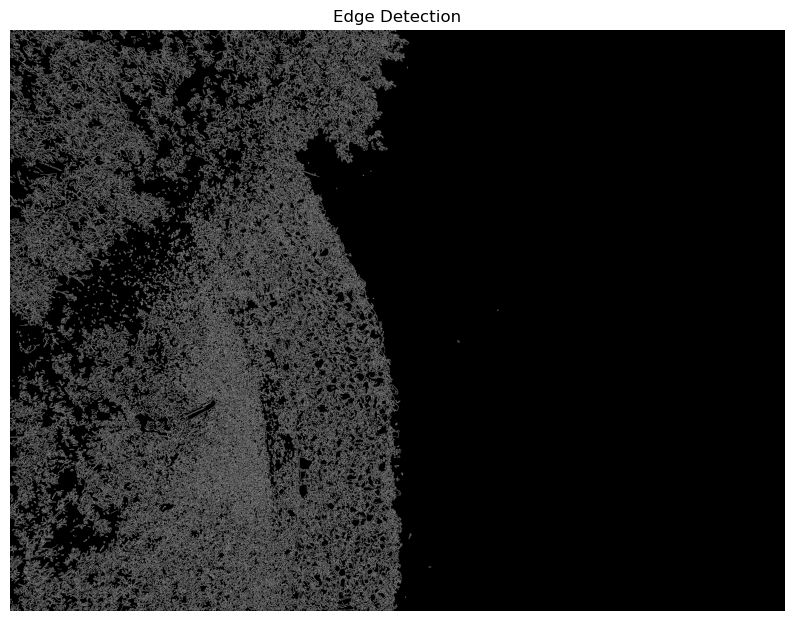

In [2]:
# Load the image
image_path = '/mnt/z/Programação/Bordalago/DJI_0173.JPG'
image = cv2.imread(image_path)

# Convert the image to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur, which removes some of the noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Edge detection using Canny
edges = cv2.Canny(blurred, 50, 150)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.show()

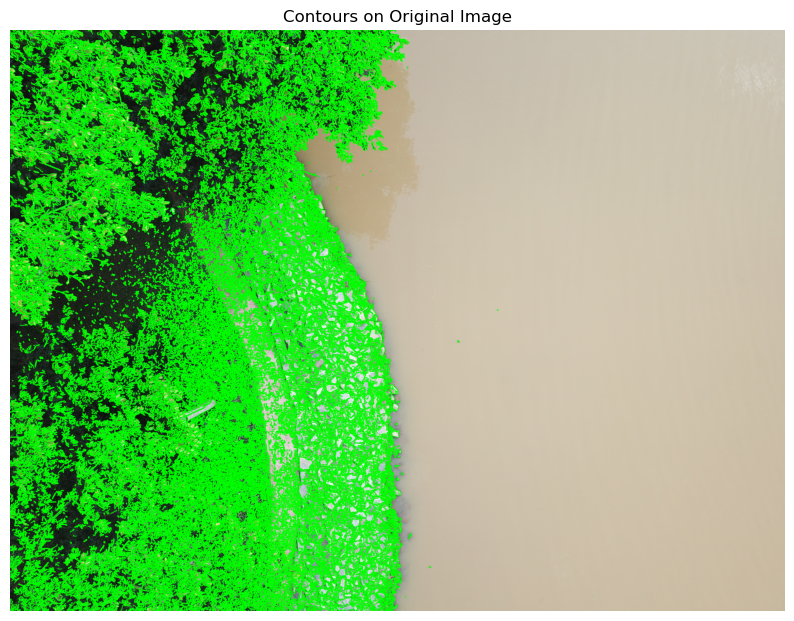

In [3]:
# Find contours from the edged image
contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
image_contours = image.copy()
cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
plt.title('Contours on Original Image')
plt.axis('off')
plt.show()


In [7]:
def process_frame(frame):
    # Reduzir a resolução
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(frame, contours, -1, (0, 255, 0), 2)
    
    # Escalar de volta para a resolução original para salvar no vídeo (opcional)
    frame = cv2.resize(frame, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
    return frame

video_path = '/mnt/z/Programação/Bordalago/DJI_0161.MOV'
cap = cv2.VideoCapture(video_path)

# Verifique se o vídeo foi aberto corretamente
if not cap.isOpened():
    print("Erro ao abrir o arquivo de vídeo.")
    exit(0)

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('/mnt/z/Programação/Bordalago/saida_video.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))


frame_skip = 5  # Processa um quadro a cada 5
frame_id = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    if frame_id % frame_skip == 0:  # Processa o quadro se estiver no intervalo correto
        frame_processed = process_frame(frame)
        out.write(frame_processed)
    frame_id += 1

cap.release()
out.release()
cv2.destroyAllWindows()
